**Materials from:** https://nbviewer.jupyter.org/url/courses.cit.cornell.edu/info2950_2014fa/resources/lec22.ipynb

This follows chpt2 of "Programming Collective Intelligence", by T. Segaran:
("Ask your friends, weight according to similarity...")

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from scipy import stats

In [2]:
# A dictionary of movie reviewers and their ratings of a small set of movies
reviews={
    'Lisa Rose':
        {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5, 'Just My Luck': 3.0,
         'Superman Returns': 3.5, 'You, Me and Dupree': 2.5, 'The Night Listener': 3.0},
    'Gene Seymour':
        {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5, 'Just My Luck': 1.5,
         'Superman Returns': 5.0, 'The Night Listener': 3.0, 'You, Me and Dupree': 3.5}, 
    'Michael Phillips':
        {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0,
         'Superman Returns': 3.5, 'The Night Listener': 4.0},
    'Claudia Puig':
        {'Snakes on a Plane': 3.5, 'Just My Luck': 3.0, 'The Night Listener': 4.5,
         'Superman Returns': 4.0, 'You, Me and Dupree': 2.5},
    'Mick LaSalle':
         {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0, 'Just My Luck': 2.0,
          'Superman Returns': 3.0, 'The Night Listener': 3.0, 'You, Me and Dupree': 2.0}, 
    'Jack Matthews':
        {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
         'The Night Listener': 3.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5},
    'Toby':
        {'Snakes on a Plane':4.5,'You, Me and Dupree':1.0,'Superman Returns':4.0}
}

In [3]:
len(reviews), list(map(len,reviews.values()))

(7, [6, 6, 4, 5, 6, 5, 3])

In [4]:
#what has Toby reviewed:
reviews['Toby']

{'Snakes on a Plane': 4.5, 'You, Me and Dupree': 1.0, 'Superman Returns': 4.0}

Lisa Rose: (2.5,3.5)
Gene Seymour: (3.5,3.5)
Claudia Puig: (2.5,3.5)
Mick LaSalle: (2.0,4.0)
Jack Matthews: (3.5,4.0)
Toby: (1.0,4.5)


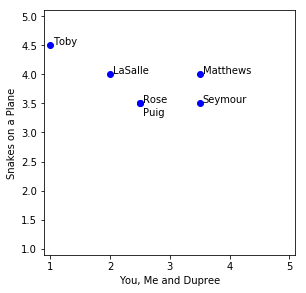

In [5]:
# plot the critics who reviewed these two:
dupree='You, Me and Dupree'
snakes='Snakes on a Plane'

crit2 = [critic for critic in reviews if dupree in reviews[critic] and snakes in reviews[critic]]
du_ratings = [reviews[c][dupree] for c in crit2]
sn_ratings = [reviews[c][snakes] for c in crit2]

plt.figure(figsize=(4.5,4.5))
plt.xlim(.9,5.1),
plt.ylim(.9,5.1)
plt.xlabel(dupree)
plt.ylabel(snakes)

plt.plot(du_ratings,sn_ratings,'bo')

for crit,x,y in zip(crit2,du_ratings,sn_ratings):
    print('{}: ({},{})'.format(crit,x,y))
#move Puig down to avoid collision
    plt.text(x+.05,y+(.01 if 'Puig' not in crit else -.2),crit.split()[-1])

plt.show()

Who's close to whom in the above fig?
Based on just these two movies, we'd conclude that Rose and Puig are quite close (exact agreement), whereas Toby is quite different from Seymour, differing by 2.5 on one movie and 1 on the other.
The distance between them on the plot above is $\sqrt{(3.5-1)^2+(4.5-3.5)^2}\approx2.69$. For critics who have co-rated multiple movies, this notion of distance generalizes to taking the square root of the sum of the squares of all of those co-rated movies, $d^2_{ij}=\sum_m\bigl(r_m(i) - r_m(j)\bigr)^2$. (This corresponds to the Euclidean distance between $r_m(i)$ and $r_m(j)$, considered as vectors in an M-dimensional space, $d^2_{ij}=\bigl(\vec r(i)-\vec r(j)\bigr)^2$.)

It is convenient to employ a measure of *similarity* rather than of distance (the two are inversely related), defined as $s_{ij}={1\over 1+d_{ij}^2}$. The similarity $s_{ij}$ goes from 0 similarity when the distance is very large, up to similarity 1 when the distance goes to zero.  Here `sim_distance()` returns this similarity score for two reviewers, based only on the items they've both rated:

In [6]:
def sim_distance(prefs,person1,person2):
  # Get the list of shared_items
    shared_items = [item for item in prefs[person1] if item in prefs[person2]]

  # if they have no ratings in common, return 0
    if len(shared_items) == 0:
        return 0

    v1 = np.array([prefs[person1][item] for item in shared_items])
    v2 = np.array([prefs[person2][item] for item in shared_items])

  # use numpy euclidean distance (sqrt(sum of squares))
    dist = np.linalg.norm(v1 - v2)

  #transform to similarity ranging from 0 to 1
  #truncate to three after decimal point
    return 1/(1 + dist**2)

Lisa Rose [2.5 2.5 3.  3.  3.5 3.5]
Gene Seymour [3.  3.5 1.5 3.  3.5 5. ]
Mick LaSalle [3. 2. 2. 3. 4. 3.]


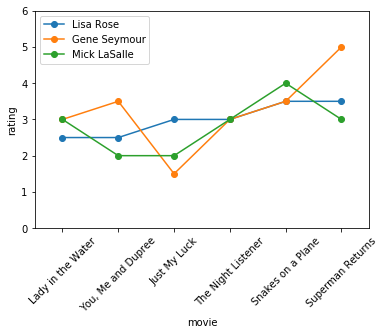

In [7]:
#'Lisa Rose' happened to rate all movies
all_movies = sorted(reviews['Lisa Rose'],key=reviews['Lisa Rose'].get)

def ratings(critic):
    return np.array([reviews[critic][m] for m in all_movies])

for crit in ('Lisa Rose','Gene Seymour','Mick LaSalle'):
    print(crit, ratings(crit))
    plt.plot(ratings(crit),'o-',label=crit)

plt.ylim(0,6)
plt.xlim(-.5,5.5)
plt.xticks(ticks=range(0, 6), labels=all_movies, rotation=45)
plt.xlabel('movie')
plt.ylabel('rating')
plt.legend(loc='upper left')
plt.show()

In [8]:
# take two example critics
round(sim_distance(reviews,'Lisa Rose','Gene Seymour'),3)

0.148

Consider a different distance measure: Pearson correlation coefficient (+1 if correlated, -1 if anticorrelated, and values in between for noisy correlation)

Recall from [power_law.ipynb](http://nbviewer.ipython.org/url/courses.cit.cornell.edu/info2950_2013fa/resources/powerlaw.ipynb)
that `stats.linregress()` also returned an `r_value`, known as the
"[Pearson correlation coefficient](http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient)",
defined as

$$\qquad {E[(X-E[X])(Y-E[Y])]\over \sigma_X\sigma_Y}$$

Note that Pearson corrects for "grade inflation", unlike euclidean distance: one can be systematically higher than the other, offset won't matter. The numerator is the "covariance" of X and Y, equal to a times the variance of X when Y=aX+b. The denominator is equal to the absolute value |a| times the variance when Y=aX+b, so the value of the Pearson correlation coefficient is $\pm1$ for an exact linear relation (where the sign depends on the sign of the slope a). For noisier data the value is between -1 and 1, with 0 corresponding to no correlation.

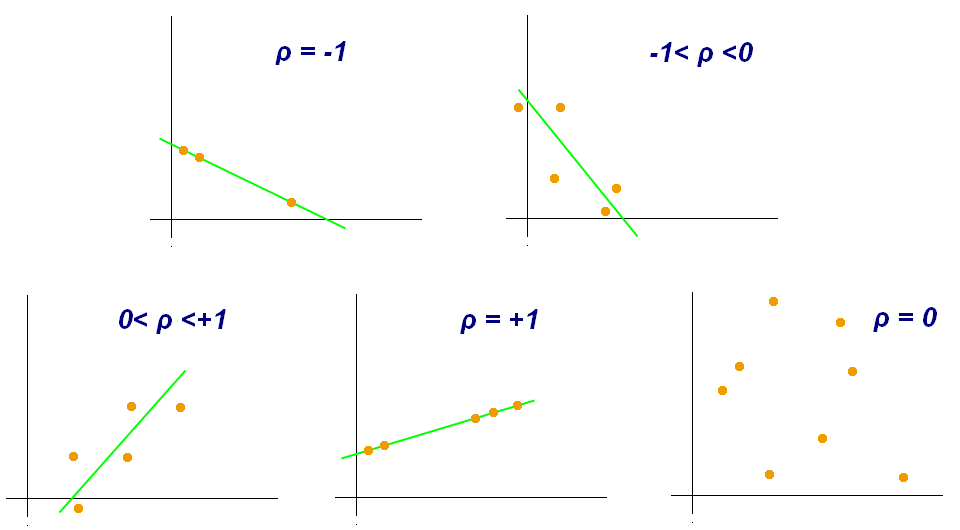

In [9]:
from IPython.display import Image
Image('Pearson.png',width=600)

In [10]:
#three critics who rated all 6
crit6 = [crit for crit in reviews if len(reviews[crit])==6]
#three pairs from above set
pairs = [(crit6[i],crit6[j]) for i in range(len(crit6)) for j in range(i)]

In [11]:
all_movies

['Lady in the Water',
 'You, Me and Dupree',
 'Just My Luck',
 'The Night Listener',
 'Snakes on a Plane',
 'Superman Returns']

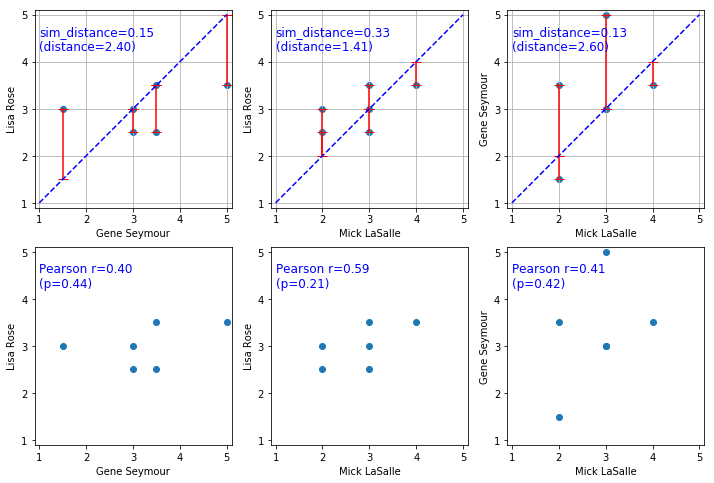

In [12]:
#compare the similarity based on distance with Pearson for these three pairs:

_, ax = plt.subplots(2, 3, figsize=(12, 8))
for j,(c1,c2) in enumerate(pairs):
    ax1 = ax[0][j]
    ax1.scatter(ratings(c1),ratings(c2))
    for (x,y) in zip(ratings(c1),ratings(c2)):
        ax1.plot((x,x),(x,y),'r-',marker='_',ms=10)        
    ax1.grid(True)
    ax1.set_xticks(range(1,6))
    ax1.set_yticks(range(1,6))
    ax1.axis((0.9,5.1,0.9,5.1))
    ax1.set_xlabel(c1)
    ax1.set_ylabel(c2)
    ax1.plot((1,5),(1,5),'b--')
    d = np.linalg.norm(ratings(c1) - ratings(c2))
    ax1.text(1,4.25,'sim_distance={:.2f}\n(distance={:.2f})'.\
         format(sim_distance(reviews,c1,c2),d),fontsize=12,color='b')
        
    ax2 = ax[1][j]
    ax2.scatter(ratings(c1),ratings(c2))
    ax2.set_xticks(range(1,6))
    ax2.set_yticks(range(1,6))
    ax2.axis((0.9,5.1,0.9,5.1))
    ax2.set_xlabel(c1)
    ax2.set_ylabel(c2)
    r,p = stats.pearsonr(ratings(c1),ratings(c2))
    ax2.text(1,4.25,'Pearson r={:.2f}\n(p={:.2f})'.format(r,p),fontsize=12,color='b')
plt.show()

In [13]:
#define function to look at the Pearson r for a few critic pairs

def show_pearson(prefs,crit1,crit2):
    shared_items=[item for item in prefs[crit1] if item in prefs[crit2]]

    plt.figure(figsize=(5,5))
    plt.xlim(.8,5.2)
    plt.ylim(.8,5.2)
    xdata = [prefs[crit1][item] for item in shared_items]
    ydata = [prefs[crit2][item] for item in shared_items]

    slope, intercept, r_value, p_value, std_err = stats.linregress(xdata,ydata)
    plt.xlabel(crit1)
    plt.ylabel(crit2)
    
    plt.plot(xdata,ydata,'o')
    plt.plot(slope*np.arange(6)+intercept,'--')
    
    voffset={(x,y):.01 for x,y in zip(xdata,ydata)}
    for item in shared_items:
        x,y=prefs[crit1][item],prefs[crit2][item]
        plt.text(x+.05, y+voffset[(x,y)], item)
        voffset[(x,y)]-=.15
    plt.text(1.25,4.5,'Pearson r = {:.2f}'.format(r_value),fontsize=14,color='b')
    plt.show()

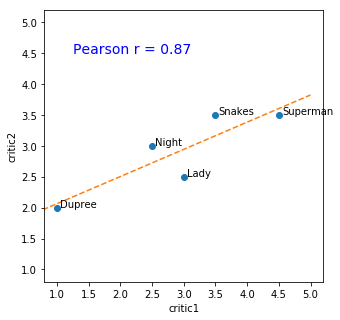

In [14]:
#two fake critics roughly correlated
fcritics={'critic1':{'Dupree':1,'Night':2.5,'Lady':3,'Snakes':3.5,'Superman':4.5},
         'critic2':{'Dupree':2,'Night':3,'Lady':2.5,'Snakes':3.5,'Superman':3.5}}
show_pearson(fcritics,'critic1','critic2')

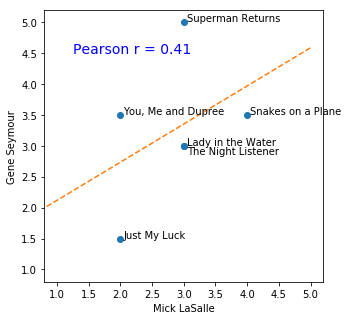

In [15]:
#two from original set not quite as well correlated
show_pearson(reviews,'Mick LaSalle','Gene Seymour')

In [16]:
#now define similarity measure, analogous to sim_distance
def sim_pearson(prefs,crit1,crit2):
    shared_items=[item for item in prefs[crit1] if item in prefs[crit2]]
  #  shared_items=list(set(prefs[person1]) & set(prefs[person2]))  #equivalent
    if len(shared_items)==0:
        return 0
    xdata = [prefs[crit1][item] for item in shared_items]
    ydata = [prefs[crit2][item] for item in shared_items]
    r,p = stats.pearsonr(xdata,ydata)
    # check for nan
    if r != r:
        return 0
    else:
        return r

Now rank the critics, find `other` critics similar to given `person` ranked according to similarity measure:

In [17]:
# Returns the best matches for person from the prefs dictionary. 
# Number of results and similarity function are optional params.

def topMatches(prefs, person, n=5, similarity=sim_pearson):
    scores=[(other, round(similarity(prefs,person,other),3))
                      for other in prefs if other != person]
    return sorted(scores,key=lambda x:x[1],reverse=True)[:n]

In [18]:
topMatches(reviews,'Toby',6)

[('Lisa Rose', 0.991),
 ('Mick LaSalle', 0.924),
 ('Claudia Puig', 0.893),
 ('Jack Matthews', 0.663),
 ('Gene Seymour', 0.381),
 ('Michael Phillips', -1.0)]

In [19]:
# see how topmatches function works using other similarity measure
topMatches(reviews,'Toby', n=3, similarity=sim_distance)

[('Mick LaSalle', 0.308), ('Michael Phillips', 0.286), ('Claudia Puig', 0.235)]

But here what we really want is to make a recommendation. For this, we could use just the most similar person, and select any movies that person liked that you haven't seen. But that person might not have seen the most relevant movie, or might be an outlier on that particular movie (i.e., liked it but most people with tastes similar to yours didn't like it, or vice versa).

So instead, get recommendations by using a weighted average of *every* other person's ratings, weighted according to that person's similarity to you. Suppose person $i$ has similarity $s_i$ to you, and gives rating $r_i(m)$ to movie $m$ that you haven't seen, then that person will contribute $s_i\cdot r_i(m)$ to your likely preference for movie $m$, so that others' ratings are weighted in proportion to their similarity to you. Then we sum on $i$ over all those who have rated movie $m$, and divide by the same sum over the $s_i$ to give the expected value of your rating of movie $m$:

$$\qquad\qquad E[r_m]={\sum_{i\ |\ i\ {\rm rated\ }m} s_i\cdot r_m(i)\over \sum_{i\ |\ i\ {\rm rated\ }m} s_i}$$

This equation is implemented in the function below, and gives the expected rating of all movies one hasn't seen:

In [20]:
def getRecommendations(prefs,person,similarity=sim_pearson):
    totals={}
    simSums={}
    for other in prefs:
        # don't compare me to myself
        if other==person:
            continue
        sim = similarity(prefs,person,other)
    
        # ignore scores of zero or lower
        if sim <= 0:
            continue
        for item in prefs[other]:
            # only score movies I haven't seen yet
            if item not in prefs[person] or prefs[person][item] == 0:
                # Similarity * Score
                if item not in totals:
                    totals[item]=0
                    simSums[item]=0
                totals[item] += prefs[other][item]*sim
                # Sum of similarities
                simSums[item] += sim

    # Create the normalized list
    rankings =[(item,round((totals[item] + 1e-15)/(simSums[item] + 1e-15),3)) for item in totals]

    # Return the sorted list
    return sorted(rankings,key=lambda x:x[1],reverse=True)

In [21]:
getRecommendations(reviews,'Toby')
#also gives likely rating

[('The Night Listener', 3.348),
 ('Lady in the Water', 2.833),
 ('Just My Luck', 2.531)]

In [22]:
#or use other distance measure
getRecommendations(reviews,'Toby',similarity=sim_distance)

[('The Night Listener', 3.5),
 ('Lady in the Water', 2.756),
 ('Just My Luck', 2.462)]

Now suppose you want matching products, e.g., Amazon "customers have also bought". Now instead of similarity between people based on the ratings given to some object, averaged over objects both have rated, now we consider similarity between objects that are rated, based on whether different reviewers tend to rate them similarly.  This is equivalent to reversing the roles of reviewers and objects, so that it is now the objects that are rating the reviewers:

In [23]:
#first reverse role of items and objects
def transformPrefs(prefs):
    result=defaultdict(dict)
    for person in prefs:
        for item in prefs[person]:      
          # Flip item and person
          result[item][person]=prefs[person][item]
    return dict(result)

Try this for the movie ratings above, to get similarities between movies:

In [24]:
movies=transformPrefs(reviews)
dict(movies)

{'Lady in the Water': {'Lisa Rose': 2.5,
  'Gene Seymour': 3.0,
  'Michael Phillips': 2.5,
  'Mick LaSalle': 3.0,
  'Jack Matthews': 3.0},
 'Snakes on a Plane': {'Lisa Rose': 3.5,
  'Gene Seymour': 3.5,
  'Michael Phillips': 3.0,
  'Claudia Puig': 3.5,
  'Mick LaSalle': 4.0,
  'Jack Matthews': 4.0,
  'Toby': 4.5},
 'Just My Luck': {'Lisa Rose': 3.0,
  'Gene Seymour': 1.5,
  'Claudia Puig': 3.0,
  'Mick LaSalle': 2.0},
 'Superman Returns': {'Lisa Rose': 3.5,
  'Gene Seymour': 5.0,
  'Michael Phillips': 3.5,
  'Claudia Puig': 4.0,
  'Mick LaSalle': 3.0,
  'Jack Matthews': 5.0,
  'Toby': 4.0},
 'You, Me and Dupree': {'Lisa Rose': 2.5,
  'Gene Seymour': 3.5,
  'Claudia Puig': 2.5,
  'Mick LaSalle': 2.0,
  'Jack Matthews': 3.5,
  'Toby': 1.0},
 'The Night Listener': {'Lisa Rose': 3.0,
  'Gene Seymour': 3.0,
  'Michael Phillips': 4.0,
  'Claudia Puig': 4.5,
  'Mick LaSalle': 3.0,
  'Jack Matthews': 3.0}}

In [25]:
#now topmatches gives similar movies rather than similar reviewers
topMatches(movies,'Superman Returns')

[('You, Me and Dupree', 0.658),
 ('Lady in the Water', 0.488),
 ('Snakes on a Plane', 0.112),
 ('The Night Listener', -0.18),
 ('Just My Luck', -0.423)]

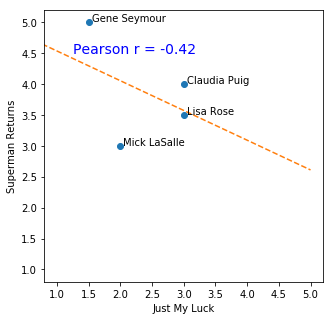

In [26]:
#note negative scores, reviewers who like one dislike the other
show_pearson(movies,'Just My Luck','Superman Returns')

Finally, the analog of the recommended movie for a given person, after reversing the roles of people and movies, is the recommended person for a movie, i.e., the one most likely to like it:

In [27]:
getRecommendations(movies,'Just My Luck')
#find critics for movie ... invite to premiere?

[('Michael Phillips', 4.0), ('Jack Matthews', 3.0)]

It's easy to apply these to de.licio.us data (details in the chpt2 of text mentioned at top).
python code to interact with delicious api is here:
http://code.google.com/p/pydelicious/source

Also works with real movie datasets from movielens, http://www.grouplens.org/datasets/movielens/

## Bigger data!

In [28]:
import pandas as pd
df_ratings = pd.read_csv('data/ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [29]:
users_reviews = {}
for user_id in df_ratings['userId'].unique().astype(int):
    users_reviews[user_id] = {}
    for row in df_ratings[df_ratings['userId'] == user_id].iterrows():
        movie_id = int(row[1]['movieId'])
        rating = row[1]['rating']
        users_reviews[user_id][movie_id] = rating

In [30]:
df_movies = pd.read_csv('data/movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [31]:
def id2name(movie_id):
    return df_movies[df_movies['movieId'] == movie_id]['title'].values[0]

In [32]:
movies_cnt = df_ratings['movieId'].value_counts()

def user_rated_movies(user_id, min_cnt=10):
    return {id2name(movie_id): rating for movie_id, rating in users_reviews[user_id].items() if movies_cnt[movie_id] >= min_cnt}

In [33]:
sorted(user_rated_movies(599).items(), key=lambda x:x[1], reverse=True)

[('Rumble in the Bronx (Hont faan kui) (1995)', 5.0),
 ('Star Wars: Episode IV - A New Hope (1977)', 5.0),
 ('Léon: The Professional (a.k.a. The Professional) (Léon) (1994)', 5.0),
 ('Pulp Fiction (1994)', 5.0),
 ('Ghost in the Shell (Kôkaku kidôtai) (1995)', 5.0),
 ('Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)',
  5.0),
 ('2001: A Space Odyssey (1968)', 5.0),
 ('His Girl Friday (1940)', 5.0),
 ('Reservoir Dogs (1992)', 5.0),
 ('Paths of Glory (1957)', 5.0),
 ('Star Wars: Episode V - The Empire Strikes Back (1980)', 5.0),
 ('Aliens (1986)', 5.0),
 ('Apocalypse Now (1979)', 5.0),
 ('Star Wars: Episode VI - Return of the Jedi (1983)', 5.0),
 ('Alien (1979)', 5.0),
 ('Akira (1988)', 5.0),
 ('High Noon (1952)', 5.0),
 ('Big Lebowski, The (1998)', 5.0),
 ('Labyrinth (1986)', 5.0),
 ('Rushmore (1998)', 5.0),
 ('Thin Red Line, The (1998)', 5.0),
 ('Matrix, The (1999)', 5.0),
 ('American Beauty (1999)', 5.0),
 ('Fight Club (1999)', 5.0),
 ('Yojimbo (1961)', 5.0)

In [34]:
def getRecommendations(prefs, person, similarity=sim_pearson, min_cnt=10):
    totals = {}
    simSums = {}
    moviesCnt = {}
    for other in prefs:
        # don't compare me to myself
        if other==person:
            continue
        sim = similarity(prefs,person,other)
    
        # ignore scores of zero or lower
        if sim <= 0:
            continue
        for item in prefs[other]:
            # only score movies I haven't seen yet
            if item not in prefs[person] or prefs[person][item] == 0:
                # Similarity * Score
                if item not in totals:
                    totals[item] = 0
                    simSums[item] = 0
                    moviesCnt[item] = 0
                totals[item] += prefs[other][item]*sim
                # Sum of similarities
                simSums[item] += sim
                moviesCnt[item] += 1

    # Create the normalized list
    rankings = [(item,(totals[item] + 1e-15)/(simSums[item] + 1e-15)) for item in totals if moviesCnt[item] >= min_cnt]

    # Return the sorted list
    return sorted(rankings,key=lambda x:x[1],reverse=True)

In [37]:
def getMoviesRecommendations(user_id, similarity=sim_pearson, min_cnt=10):
    return {id2name(k): v for (k, v) in getRecommendations(users_reviews, user_id, similarity, min_cnt)}

In [38]:
getMoviesRecommendations(599)

/Users/nikolaysafonov/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


{'Louis C.K.: Live at the Beacon Theater (2011)': 4.589242257205161,
 'Secrets & Lies (1996)': 4.577160774267768,
 'Celebration, The (Festen) (1998)': 4.530013060446408,
 "Guess Who's Coming to Dinner (1967)": 4.5065325024416,
 'Ran (1985)': 4.492571543604912,
 'It Happened One Night (1934)': 4.422848315292008,
 "Schindler's List (1993)": 4.394752287353406,
 "Once Upon a Time in the West (C'era una volta il West) (1968)": 4.384471386478495,
 'Creature Comforts (1989)': 4.379844548344217,
 'Drugstore Cowboy (1989)': 4.363136818901609,
 'In the Name of the Father (1993)': 4.361553655827658,
 'Cool Hand Luke (1967)': 4.353652639989913,
 'Hoop Dreams (1994)': 4.320598067094927,
 '12 Angry Men (1957)': 4.298147918307931,
 'Fog of War: Eleven Lessons from the Life of Robert S. McNamara, The (2003)': 4.2926092136700165,
 'To Catch a Thief (1955)': 4.284421486858774,
 'Manchurian Candidate, The (1962)': 4.278612902852434,
 'Living in Oblivion (1995)': 4.277918451890852,
 'All About Eve (1950)'

In [39]:
def topRecommendations(user_id, similarity=sim_pearson, min_cnt=20, n=10):
    scores = getMoviesRecommendations(user_id, similarity, min_cnt)
    return sorted(scores.items(), key=lambda x:x[1], reverse=True)[:n]

In [40]:
topRecommendations(599)

[("Schindler's List (1993)", 4.394752287353406),
 ('In the Name of the Father (1993)', 4.361553655827658),
 ('Cool Hand Luke (1967)', 4.353652639989913),
 ('Hoop Dreams (1994)', 4.320598067094927),
 ('12 Angry Men (1957)', 4.298147918307931),
 ('To Catch a Thief (1955)', 4.284421486858774),
 ('Manchurian Candidate, The (1962)', 4.278612902852434),
 ('All About Eve (1950)', 4.273392177943824),
 ('Harold and Maude (1971)', 4.270276021984123),
 ('Patton (1970)', 4.260758340986617)]

In [41]:
topRecommendations(599, sim_distance)

[('To Catch a Thief (1955)', 4.566619803787956),
 ('Harold and Maude (1971)', 4.5273728517126015),
 ('All About Eve (1950)', 4.501999475400335),
 ('In the Name of the Father (1993)', 4.3986058151722265),
 ('Cool Hand Luke (1967)', 4.385022511142971),
 ('Manchurian Candidate, The (1962)', 4.384672759144991),
 ('To Kill a Mockingbird (1962)', 4.370380642484914),
 ('Life Is Beautiful (La Vita è bella) (1997)', 4.354775143873461),
 ("Schindler's List (1993)", 4.304023092525129),
 ('Bridge on the River Kwai, The (1957)', 4.295186889633956)]